Word embedding is one of the most popular representation of document vocabulary. It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.

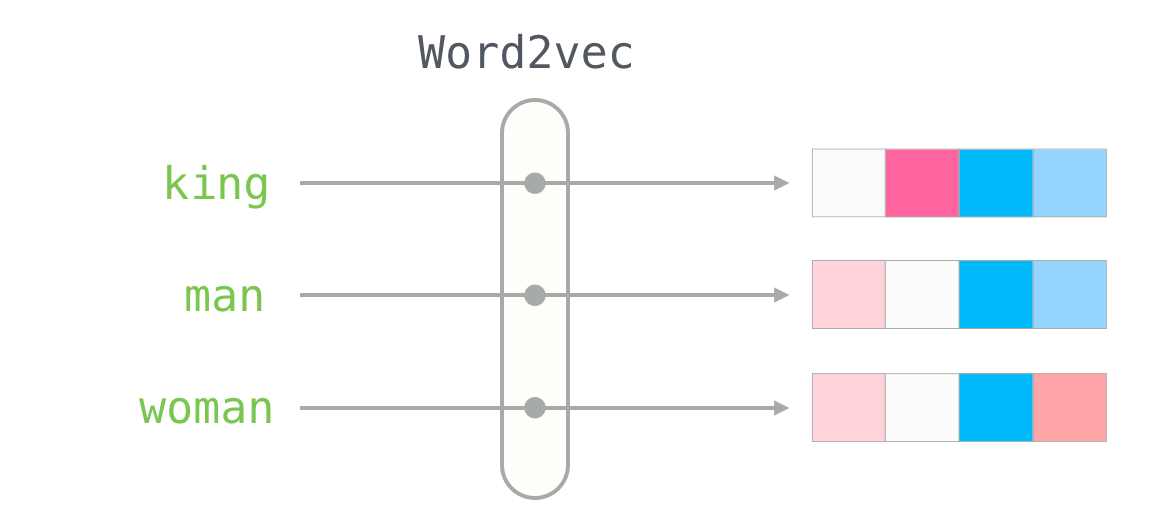

Word2Vec is one of the most popular technique to learn word embeddings using shallow neural network. It was developed by Tomas Mikolov in 2013 at Google.

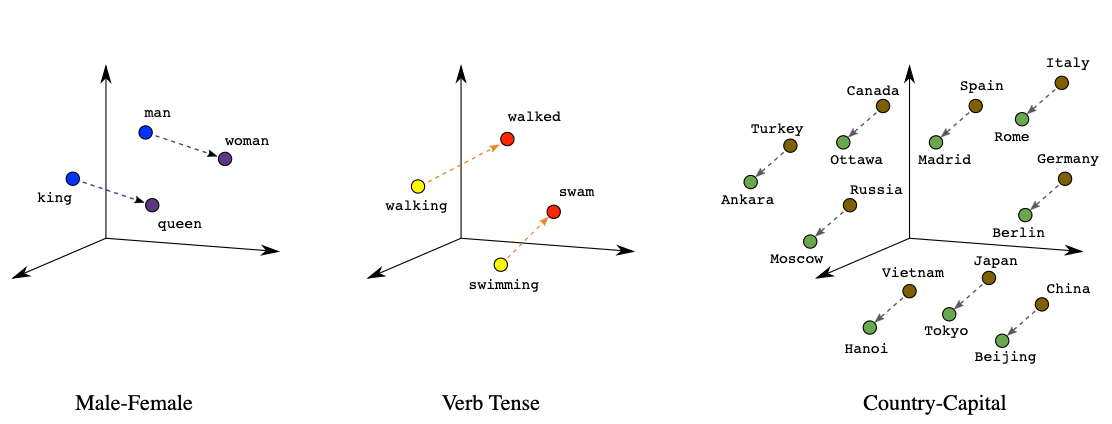

## How to get `word2vec` 
- Use Deep Learning to train your own data and model
- Use SpaCy to get pretrained model

## Word Vectors with Spacy

https://github.com/explosion/spaCy

https://spacy.io/usage/vectors-similarity

Similarity is determined by comparing word vectors or “word embeddings”, multi-dimensional meaning representations of a word. 
!pip install spacy


`python -m spacy download en_core_web_lg`

In [1]:
#!pip install spacy

`en_vectors_web_lg`, which includes over 1 million unique vectors

In [2]:
import spacy

In [3]:
#!python -m spacy download en_core_web_sm

In [4]:
#nlp = spacy.load('en_core_web_sm')

In [5]:
nlp = spacy.load('en_core_web_lg')

In [6]:
x = 'dog cat lion dlgl'
doc = nlp(x)

In [7]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_,
          token.dep_, token.shape_, token.is_alpha, token.is_stop, token.vector_norm)

dog dog NOUN NN compound xxx True False 75.254234
cat cat NOUN NN compound xxx True False 63.188496
lion lion PROPN NNP ROOT xxxx True False 55.145737
dlgl dlgl PROPN NNP punct xxxx True False 0.0


In [8]:
for token in doc:
    print(token.text, token.has_vector, token.vector.shape)

dog True (300,)
cat True (300,)
lion True (300,)
dlgl False (300,)


In [9]:
nlp.vocab.vectors.shape

(514157, 300)

## Semantic Similarity 

spaCy is able to compare two objects, and make a prediction of how similar they are. Predicting similarity is useful for building recommendation systems or flagging duplicates. 

For example, you can suggest a user content that’s similar to what they’re currently looking at, or label a support ticket as a duplicate if it’s very similar to an already existing one.

Each `Doc, Span and Token` comes with a `.similarity()` method that lets you compare it with another object, and determine the similarity.

In [10]:
x

'dog cat lion dlgl'

In [11]:
doc = nlp(x)

In [12]:
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))

dog dog 1.0
dog cat 0.8220816850662231
dog lion 0.2949307858943939
dog dlgl 0.0
cat dog 0.8220816850662231
cat cat 1.0
cat lion 0.3854507803916931
cat dlgl 0.0
lion dog 0.2949307858943939
lion cat 0.3854507803916931
lion lion 1.0
lion dlgl 0.0
dlgl dog 0.0
dlgl cat 0.0
dlgl lion 0.0
dlgl dlgl 1.0


/var/folders/86/ly7mnyys0qzb9zycsyvdcgsm0000gn/T/ipykernel_60183/679181337.py:3: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  print(token1.text, token2.text, token1.similarity(token2))


# Model Building for `word2vec` 

## Data Preparation 

In [13]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /private/var/folders/86/ly7mnyys0qzb9zycsyvdcgsm0000gn/T/pip-req-build-7qvixjma
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /private/var/folders/86/ly7mnyys0qzb9zycsyvdcgsm0000gn/T/pip-req-build-7qvixjma
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7603 sha256=298c1d399224ed9cdbbceaca0d3e9592efe8b56aa03bf9e2a88e38d0b4fd477a
  Stored in directory: /private/var/folders/86/ly7mnyys0qzb9zycsyvdcgsm0000gn/T/pip-ephem-wheel-cache-5ddspcqq/wheels/d1/c3/bb/559fe93e652b51cbc532f17e9693f3b70055f8560cf06c1fb3
Successfully built preprocess-kgptalkie
  Attempting uninstall: preprocess-kgptalkie
    Found existing installation: preprocess-kgptalkie 0.1.3
    

In [14]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

In [15]:
import preprocess_kgptalkie as ps

In [16]:
df = pd.read_csv('../../Inputs/imdb_reviews.txt', sep = '\t', header = None)
df.columns = ['reviews', 'sentiment']

In [17]:
df.head()

reviews  sentiment
0  A very, very, very slow-moving, aimless movie ...          0
1  Not sure who was more lost - the flat characte...          0
2  Attempting artiness with black & white and cle...          0
3       Very little music or anything to speak of.            0
4  The best scene in the movie was when Gerardo i...          1

In [18]:
x = "A very, very, very slow-moving, aimlss movie"
ps.spelling_correction(x).raw_sentences[0]

'A very, very, very slow-moving, aimless movie'

In [19]:
%%time
df['reviews'] = df['reviews'].apply(lambda x: ps.cont_exp(x))
df['reviews'] = df['reviews'].apply(lambda x: ps.remove_emails(x))
df['reviews'] = df['reviews'].apply(lambda x: ps.remove_html_tags(x))
df['reviews'] = df['reviews'].apply(lambda x: ps.remove_urls(x))
df['reviews'] = df['reviews'].apply(lambda x: ps.remove_special_chars(x))
df['reviews'] = df['reviews'].apply(lambda x: ps.remove_accented_chars(x))
df['reviews'] = df['reviews'].apply(lambda x: ps.make_base(x))
df['reviews'] = df['reviews'].apply(lambda x: ps.spelling_correction(x).raw_sentences[0])

/Users/mucoa/opt/anaconda3/lib/python3.9/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


CPU times: user 2min 1s, sys: 427 ms, total: 2min 2s
Wall time: 2min 2s


In [20]:
df.head()

reviews  sentiment
0  a very very very slowmoving aimless movie abou...          0
1  not sure who was more lose the flat character ...          0
2  attempt artless with black white and clever ca...          0
3          very little music or anything to speak of          0
4  the good scene in the movie was when Gerard is...          1

## ML Model Building 

In [21]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [22]:
# Process a text document
doc = nlp("sample sentence")

# Access the vector for the entire document
doc_vector = doc.vector

# Access vectors for each token in the document
token_vectors = [token.vector for token in doc]

# Example: Print the document vector
print("Document Vector:", doc_vector)

# Example: Print vectors for each token
for token in doc:
    print(f"Token: {token.text}, Vector: {token.vector}")

Document Vector: [-1.6312051  -1.77126     0.49029994  1.41223     3.0551     -2.1298451
  1.7387199   1.1848049  -4.4640503  -0.44414997  6.6376      0.29455498
 -4.87465     0.538985   -0.68287504 -1.093345    1.58077     0.01084995
  1.11772    -0.22670007 -3.9074502   0.59615505 -4.5581503   3.1313748
 -1.811435    0.84535     0.36220497  0.32244998 -2.50177     0.8336799
  1.9437001   2.227465   -1.657795    1.752925    2.5668595  -3.1290998
  1.93395    -1.68422     2.72999     1.86072    -1.1065049  -2.35265
 -1.56328     3.53975    -2.71245    -0.71593     3.6627     -2.355585
 -1.1167101  -2.2278      0.16095     1.191      -1.6508     -0.844618
 -0.81776     2.33855    -1.012065   -3.0630999   3.4566002  -2.8019
  0.71364     2.12855    -4.702       0.20475006  3.08455     4.4457
 -0.08330005 -4.0207     -0.6371175   2.73525     0.17925501 -0.26819
 -1.406105   -1.711055   -1.6803501   1.36797    -2.91735     1.00579
 -2.4085002  -0.03084502 -5.7543     -0.06544995  1.2242501

In [23]:
doc.vector.shape

(300,)

In [24]:
(token_vectors[0]+token_vectors[1])/2==doc.vector

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [25]:
doc.vector.reshape(1, -1).shape

(1, 300)

In [26]:
def get_vec(x):
    doc = nlp(x)
    vec = doc.vector
    return vec

In [27]:
df['vec'] = df['reviews'].apply(lambda x: get_vec(x))

In [28]:
df.head()

reviews  sentiment  \
0  a very very very slowmoving aimless movie abou...          0   
1  not sure who was more lose the flat character ...          0   
2  attempt artless with black white and clever ca...          0   
3          very little music or anything to speak of          0   
4  the good scene in the movie was when Gerard is...          1   

                                                 vec  
0  [-2.037473, 1.9009953, -2.9871805, -1.7169145,...  
1  [-3.7171004, 1.0740024, -2.7910752, 0.02449170...  
2  [-2.9383492, 0.18677144, -2.3205724, -0.493188...  
3  [-1.9868913, 2.2468886, -4.532146, -2.550426, ...  
4  [-1.6121409, 2.763651, -2.7169354, -1.0312456,...

In [29]:
df.shape

(748, 3)

In [30]:
X = df['vec'].to_numpy()
X = X.reshape(-1, 1)

In [31]:
X.shape

(748, 1)

In [32]:
X = np.concatenate(np.concatenate(X, axis = 0), axis = 0).reshape(-1, 300)

In [33]:
X.shape

(748, 300)

In [34]:
y = df['sentiment']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [36]:
X_train.shape, X_test.shape

((598, 300), (150, 300))

## ML Model Traning and Testing 

In [37]:
clf = LogisticRegression()

In [38]:
clf.fit(X_train, y_train)

/Users/mucoa/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_pred = clf.predict(X_test)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78        73
           1       0.80      0.77      0.78        77

    accuracy                           0.78       150
   macro avg       0.78      0.78      0.78       150
weighted avg       0.78      0.78      0.78       150



In [41]:
import pickle 

In [42]:
pickle.dump(clf, open('../../Outputs/w2v_sentiment.pkl', 'wb'))

## Support Vector Machine on `word2vec`

In [43]:
from sklearn.svm import LinearSVC

In [44]:
clf = LinearSVC()

In [45]:
clf.fit(X_train, y_train)

/Users/mucoa/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [46]:
y_pred = clf.predict(X_test)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68        73
           1       0.70      0.70      0.70        77

    accuracy                           0.69       150
   macro avg       0.69      0.69      0.69       150
weighted avg       0.69      0.69      0.69       150



## Grid Search Cross Validation for Hyperparameters Tuning¶ 

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:

logit = LogisticRegression()

In [50]:
hyperparameters = {
    'penalty': ['l1', 'l2']
}

In [51]:
clf = GridSearchCV(logit, hyperparameters, n_jobs=-1, cv = 5)

In [52]:
%%time
clf.fit(X_train, y_train)

CPU times: user 447 ms, sys: 321 ms, total: 768 ms
Wall time: 2.61 s


/Users/mucoa/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mucoa/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2']})

In [53]:
clf.best_params_

{'penalty': 'l2'}

In [54]:
clf.best_score_

0.7375070028011204

In [55]:
y_pred = clf.predict(X_test)

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78        73
           1       0.80      0.77      0.78        77

    accuracy                           0.78       150
   macro avg       0.78      0.78      0.78       150
weighted avg       0.78      0.78      0.78       150



### References

http://jalammar.github.io/illustrated-word2vec/

https://github.com/laxmimerit?tab=repositories

Andreas Mueller